In [41]:
import torch
import numpy as np
import pandas as pd 
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.autograd import Variable

In [4]:
torch.__version__

'1.13.1'

Креираме тензор иницијализиран со вредности

A tensor is a multi-dimensional array used in various machine learning and deep learning frameworks, such as PyTorch and TensorFlow. Tensors are generalizations of matrices to higher dimensions and can be used to represent data in various forms, such as scalars, vectors, matrices, and higher-dimensional arrays.

Scalars are 0-dimensional, vectors are 1-dimensional, matrices are 2-dimensional.

Key feature of tensors are that they can utilize GPU processing. Enhances computational speed for neutral networks.   

In [5]:
tensor = torch.Tensor([[[1,3], [3,5], [5,7]], [[7,9], [9,2], [2,4]]])

Доколку сакаме да креираме тензор со димензии 2x2 со 4 неодредени вредности ја користиме следнава команда

In [11]:
tensor_uninitialized = torch.Tensor(2,2)
torch.numel(tensor_uninitialized)

4

Можеме тензорот да го иницијализираме со случајни вредности на следниов начин

In [14]:
tensor_uninitialized = torch.randn(3,2) #3 redici, 2 koloni
tensor_uninitialized

tensor([[-1.3390, -1.6683],
        [ 0.4623, -0.9703],
        [-0.7347, -0.0975]])

Тензорот може да го иницијализираме и со вредности од даден податочен тип: int, long, byte

In [17]:
tensor_int = torch.randn(4,4).type(torch.IntTensor) #4 redici, 4 koloni so razlicni int vrednosti
tensor_int 

tensor([[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [-1,  0,  0,  0],
        [ 0,  0,  0,  0]], dtype=torch.int32)

Многу лесно можеме да креираме тензор од numpy поле на следниов начин

In [22]:
arr = np.array([5,6,7])

tensor = torch.from_numpy(arr)
tensor

tensor([5, 6, 7])

Наопаку

In [24]:
from_tensor_to_numpy = tensor.numpy()
from_tensor_to_numpy

array([5, 6, 7])

Сега ако ги испечатите вредностите на тензорот погледнете ги вредностите. Што заклучувате? Дали овие две променливи делат иста меморија?

In [25]:
tensor

tensor([5, 6, 7])

In [26]:
from_tensor_to_numpy

array([5, 6, 7])

До елементите на еден тензор може да пристапиме слично како кај NumPy полиња. Во следниов пример пристапуваме до елементот од редот со индекс 1 и колоната со индекс 2

In [30]:
help(torch.rand)

Help on built-in function rand in module torch:

rand(...)
    rand(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Returns a tensor filled with random numbers from a uniform distribution
    on the interval :math:`[0, 1)`
    
    The shape of the tensor is defined by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword args:
        generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired

In [33]:
#The code creates a 2x3 tensor filled with random numbers from a uniform distribution on the interval [0, 1) and then accesses the element at the second row and third column (index [1,2)

initial_tensor = torch.rand(2,3) #creates a 2x3 tensor with random values
initial_tensor[1,2]

tensor(0.6207)

Да ги земеме елементите од сите редици и од колоните со почетен индекс 1 и поголем

In [35]:
initial_tensor[:,1:]

tensor([[0.3687, 0.0371],
        [0.3004, 0.6207]])

Можеме да креирам тензор со истите вредности како inicijalen_tensor, но со различни димензии. Примерот, од оригиналниот 2D тензор креира 1D тензор со 6 елементи.


In [37]:
changed_tensor = initial_tensor.view(6) #1D tensor so 6 elementi kreira
changed_tensor

tensor([0.1896, 0.3687, 0.0371, 0.6927, 0.3004, 0.6207])

Да извршиме сортирање во рамки на колони

In [39]:
sorted_tensor = torch.sort(initial_tensor, dim=0)
sorted_tensor

torch.return_types.sort(
values=tensor([[0.1896, 0.3004, 0.0371],
        [0.6927, 0.3687, 0.6207]]),
indices=tensor([[0, 1, 0],
        [1, 0, 1]]))

# Вежба 2: LSTM во Pytorch

Проблемот кој ќе го решаваме во овој пример е предвидување на бројот на патници на месечно ниво. Односно, доколку е дадена годината и месецот, треба да го предвидиме бројот во илјади. Најпрвин го симнуваме податочното множество



In [40]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2025-02-15 22:50:32--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2025-02-15 22:50:33 (19.1 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [56]:
df = pd.read_csv('airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


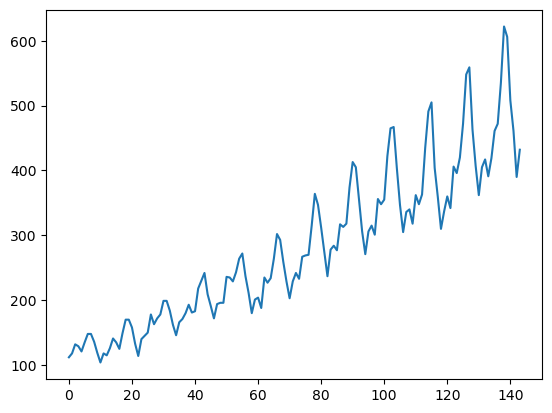

In [57]:
df = df.iloc[:,1:2].values #2 kolona ja zima - Passengers

#plt.plot(training_set, label = 'Shampoo Sales Data')
plt.plot(df, label = 'Airline Passengers Data')
plt.show()

Креираме податочно множество за тренирање и тестирање. Прозорецот кој го користиме е 4 месеци.

In [60]:
def sliding_window(data , seq_length): # creates a sliding window of a specified size over the input data. It generates sequences of data points and their corresponding targets for time series prediction
    
    x = [] #store the input sequences 
    y = [] #store their corresponding targets 
    
    for i in range(len(data) - seq_length - 1):
        
        x_temp = data[i : (i + seq_length)] #input sequence for the current window
        
        y_temp = data[i + seq_length] #y_temp is the value immediately following the input sequence, located at i + seq_length. This value is the target for the input sequence. 
        
        x.append(x_temp)
        y.append(y_temp)
    
    return np.array(x), np.array(y)
    #the lists x and y are converted to NumPy arrays and returned. The resulting arrays contain all the input sequences and their corresponding target values,

In [61]:
scaler = MinMaxScaler()

training_data = scaler.fit_transform(df)

In [62]:
training_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [63]:
seq_length = 4  #4 meseci
x, y = sliding_window(training_data, seq_length)

In [65]:
train_size = int(len(y) * 0.67) # train_size is 67% of the total data
test_size = len(y) - train_size # remaining 33%

In [67]:
# The entire dataset (x and y) is converted to PyTorch tensors wrapped in Variable objects, which are used for automatic differentiation.

#The Variable class in PyTorch is used to wrap a tensor and record the operations applied to it. This is useful for automatic differentiation.

#converted to PyTorch tensors wrapped in Variable objects 
dataX = Variable(torch.Tensor(np.array(x))) 
dataY = Variable(torch.Tensor(np.array(y)))

Training data tensors

In [70]:
#taking the first train_size elements from x and y.

trainX = Variable(torch.Tensor(np.array(x[0 : train_size]))) 
trainY = Variable(torch.Tensor(np.array(y[0 : train_size])))

Testing data tensors

In [71]:
testX = Variable(torch.Tensor(np.array(x[train_size : len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size : len(y)])))

Го креираме LSTM моделот

In [72]:
help(nn.LSTM)

Help on class LSTM in module torch.nn.modules.rnn:

class LSTM(RNNBase)
 |  LSTM(*args, **kwargs)
 |  
 |  Applies a multi-layer long short-term memory (LSTM) RNN to an input
 |  sequence.
 |  
 |  
 |  For each element in the input sequence, each layer computes the following
 |  function:
 |  
 |  .. math::
 |      \begin{array}{ll} \\
 |          i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{t-1} + b_{hi}) \\
 |          f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{t-1} + b_{hf}) \\
 |          g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{t-1} + b_{hg}) \\
 |          o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{t-1} + b_{ho}) \\
 |          c_t = f_t \odot c_{t-1} + i_t \odot g_t \\
 |          h_t = o_t \odot \tanh(c_t) \\
 |      \end{array}
 |  
 |  where :math:`h_t` is the hidden state at time `t`, :math:`c_t` is the cell
 |  state at time `t`, :math:`x_t` is the input at time `t`, :math:`h_{t-1}`
 |  is the hidden state of the layer at time `t-1` or the initial hidden
 |  state a

Args:

 |      input_size: The number of expected features in the input `x`
 
 |      hidden_size: The number of features in the hidden state `h`
 
 |      num_layers: Number of recurrent layers. E.g., setting ``num_layers=2``
 |          would mean stacking two LSTMs together to form a `stacked LSTM`,
 |          with the second LSTM taking in outputs of the first LSTM and
 |          computing the final results. Default: 1
 
 |      bias: If ``False``, then the layer does not use bias weights `b_ih` and `b_hh`.
 |          Default: ``True``
 
 |      batch_first: If ``True``, then the input and output tensors are provided
 |          as `(batch, seq, feature)` instead of `(seq, batch, feature)`.
 |          Note that this does not apply to hidden or cell states. See the
 |          Inputs/Outputs sections below for details.  Default: ``False``
 
 |      dropout: If non-zero, introduces a `Dropout` layer on the outputs of each
 |          LSTM layer except the last layer, with dropout probability equal to
 |          :attr:`dropout`. Default: 0

In [73]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes) #fully connected linear layer 
        
    def forward(self, x):
        
        #hidden state 
        h_0 = Variable(torch.zeros(
            self.num_layers,  #num of LSTM layers
            x.size(0),  #the batch size
            self.hidden_size)) # number of features in the hidden s
        
        #cell state
        c_0 = Variable(torch.zeros(
            self.num_layers, 
            x.size(0), 
            self.hidden_size))
        
        # Propagate input through LSTM
        
        # The input x is passed through the LSTM layer along with the initial hidden state h_0 and cell state c_0. The LSTM outputs: 
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

Дефинираме 2000 епохи и LSTM со еден влезен параметар, со еден слој и една класа на предвидување. Како функција на грешка користиме Mean Square Error. Погледнете како моделот ја намлува грешката при тренирање.

In [74]:
num_epochs = 2000 
learning_rate = 0.01

lstm = LSTM(num_classes=1, input_size=1, hidden_size=2,  num_layers=1)

criterion = torch.nn.MSELoss() # mean-squared error for regression
optimizer = torch.optim.Adam(params=lstm.parameters(), lr=learning_rate)

# Train the model

In [75]:
for epoch in range(num_epochs):
    outputs = lstm(trainX) #the training data is passed through the LSTM model to get the predicted outputs 
    
    optimizer.zero_grad() # The gradients of the model parameters are reset to zero before backpropagation. This is necessary because gradients are accumulated by default in PyTorch
    
    #obtain the loss function 
    loss = criterion(outputs, trainY)
    
    loss.backward() #backpropagation is performed to compute the gradients
    
    optimizer.step() #the optimizer updates the model parameters using the computed gradients 
    
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.18654
Epoch: 100, loss: 0.01145
Epoch: 200, loss: 0.00352
Epoch: 300, loss: 0.00333
Epoch: 400, loss: 0.00311
Epoch: 500, loss: 0.00284
Epoch: 600, loss: 0.00255
Epoch: 700, loss: 0.00227
Epoch: 800, loss: 0.00204
Epoch: 900, loss: 0.00188
Epoch: 1000, loss: 0.00180
Epoch: 1100, loss: 0.00178
Epoch: 1200, loss: 0.00177
Epoch: 1300, loss: 0.00176
Epoch: 1400, loss: 0.00175
Epoch: 1500, loss: 0.00174
Epoch: 1600, loss: 0.00174
Epoch: 1700, loss: 0.00173
Epoch: 1800, loss: 0.00172
Epoch: 1900, loss: 0.00171


Evaluate the model

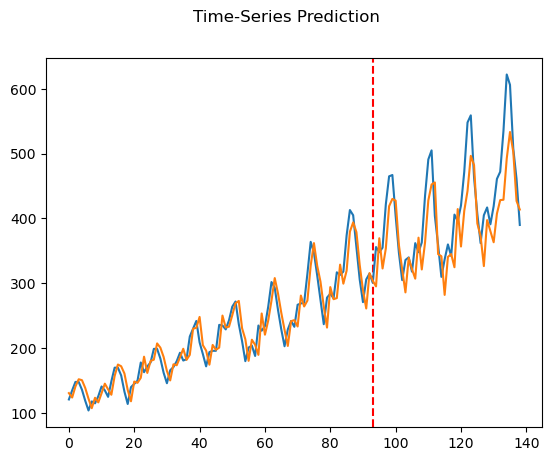

In [76]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = scaler.inverse_transform(data_predict)
dataY_plot = scaler.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()